The data set is called MINST data set.

In [14]:
# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
# Loading the MINST dataset
minst = tf.keras.datasets.mnist.load_data()

# Split into training and testing sets
(x_train, y_train),(x_test, y_test) = minst

#Normalizing the pixel values to range from 0 to 1
x_train, x_test = x_train/255.0, x_test/255.0

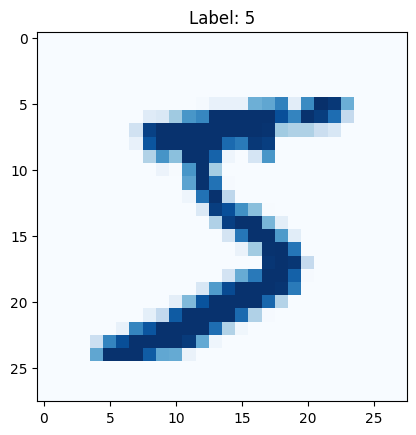

In [25]:
# Showing the first image with it's label
plt.imshow(x_train[0], cmap='Blues')
plt.title(f"Label: {y_train[0]}")
plt.show()